In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import lux

In [2]:
def basic_visualization(dataset):
    pass

In [3]:
def BloodGroupTypes(data):
    data.loc[(data['Blood Group'] == 'A+')|(data['Blood Group'] == 'A'),'Blood Group']='A+ve'
    data.loc[(data['Blood Group'] == 'B+')|(data['Blood Group'] == 'B'),'Blood Group']='B+ve'
    data.loc[(data['Blood Group'] == 'O+')|(data['Blood Group'] == 'O'),'Blood Group']='O+ve'
    data.loc[(data['Blood Group'] == 'AB+')|(data['Blood Group'] == 'AB'),'Blood Group']='AB+ve'
    data.loc[(data['Blood Group'] == 'A-'),'Blood Group']='A-ve'
    data.loc[(data['Blood Group'] == 'B-'),'Blood Group']='B-ve'
    data.loc[(data['Blood Group'] == 'O-'),'Blood Group']='O-ve'
    data.loc[(data['Blood Group'] == 'AB-'),'Blood Group']='AB-ve'
    return data

In [4]:
def data_cleaning(dataset):
    print("Initial size of dataset {}".format(dataset.shape))
    err= dataset[ data['Blood Group'] == '#REF!' ].index
    dataset.drop(err, inplace=True)
    print("Dataset Size after removing err records {}".format(dataset.shape))
    errVAl= data[ data['Age in yrs'] == '#VALUE!' ].index
    dataset.drop(errVAl, inplace=True)
    errVAl= data[ data['BMI']== '#VALUE!' ].index
    dataset.drop(errVAl, inplace=True)
    print("Dataset Size after removing err value records {}".format(dataset.shape))    
    invalid_r= dataset[(dataset['Blood Group'].isnull()) & (dataset['Sex'].isnull())& (dataset['Height'].isnull())&(dataset['Weight'].isnull())& (dataset['BMI'].isnull())].index
    dataset.drop(invalid_r, inplace=True)
    print("Dataset Size after removing invalid records {}".format(dataset.shape))
    




    

In [5]:
def data_conversion(dataset):
    dataset=BloodGroupTypes(dataset)
    print("Blood Group Types available {}".format(data['Blood Group'].unique()))
    data['Age in yrs'] = data['Age in yrs'].apply(pd.to_numeric)
    data['Weight'] = data['Weight'].str.rstrip('kg').apply(pd.to_numeric)
    data['Height'] = data['Height'].str.rstrip('cm').apply(pd.to_numeric)
    data['Temperature'] = data['Temperature'].str.rstrip('F').apply(pd.to_numeric)
    data['Pulse'] = data['Pulse'].str.rstrip('per Min').apply(pd.to_numeric)
    data['BP'] = data['BP'].str.rstrip('mmHg')
    data['BMI'] = data['BMI'].apply(pd.to_numeric)
    

In [6]:
def BP_manipulation(data):
    data.loc[(data['BP'].isnull()) & (data['Weight'].between(20,42,inclusive=True))& (data['Age in yrs'] == 10),'BP']='96/117'
    data.loc[(data['BP'].isnull()) & (data['Weight'].between(20,42,inclusive=True))& (data['Age in yrs'] == 11),'BP']='98/119'
    data.loc[(data['BP'].isnull()) & (data['Weight'].between(20,42,inclusive=True))& (data['Age in yrs'] == 12),'BP']='100/121'
    data.loc[(data['BP'].isnull()) & (data['Weight']>=50) & (data['Age in yrs'] >= 13),'BP']='102/124'
    

In [7]:
def column_gen(data):
    new=data['BP'].str.split('/',n=1,expand=True)
    data['systolic']=new[0]
    data['diastolic']=new[1]
    new=data['Left_Eye_Power'].str.split('/',n=1,expand=True)
    data['LEP0']=new[0]
    data['LEP1']=new[1]
    new=data['Right_Eye_Power'].str.split('/',n=1,expand=True)
    data['REP0']=new[0]
    data['REP1']=new[1]
    new=data['Left_Eye_Pwr_WthGlass'].str.split('/',n=1,expand=True)
    data['LEPG0']=new[0]
    data['LEPG1']=new[1]
    new=data['Right_Eye_Pwr_WthGlass'].str.split('/',n=1,expand=True)
    data['REPG0']=new[0]
    data['REPG1']=new[1]
    
    
    

In [8]:
data=pd.read_csv('data.csv')

In [9]:
data_cleaning(data)
data_conversion(data)

Initial size of dataset (2803, 34)
Dataset Size after removing err records (2801, 34)
Dataset Size after removing err value records (2704, 34)
Dataset Size after removing invalid records (1316, 34)
Blood Group Types available ['A+ve' 'O+ve' 'B+ve' 'AB+ve' 'O-ve' 'B-ve' nan 'A-ve' 'AB-ve']


In [10]:
column_gen(data)

In [11]:
errVAl= data[ data['BMI'] == '#VALUE!' ].index


In [12]:
data.corr(method ='spearman')

,Age in yrs,Height,Weight,BMI,Temperature,Pulse
Age in yrs,1.000000,0.939495,0.880381,0.533468,-0.237794,-0.214955
Height,0.939495,1.000000,0.932793,0.583786,-0.251815,-0.176448
Weight,0.880381,0.932793,1.000000,0.813248,-0.306335,-0.048817
BMI,0.533468,0.583786,0.813248,1.000000,-0.360938,0.047238
Temperature,-0.237794,-0.251815,-0.306335,-0.360938,1.000000,0.125926
Pulse,-0.214955,-0.176448,-0.048817,0.047238,0.125926,1.000000


In [13]:
bmi_correl = data[['Height','Weight','BMI','Age in yrs']].corr(method='pearson')
bmi_correl

,Height,Weight,BMI,Age in yrs
Height,1.000000,0.632792,0.290891,0.656220
Weight,0.632792,1.000000,0.915726,0.550950
BMI,0.290891,0.915726,1.000000,0.330319
Age in yrs,0.656220,0.550950,0.330319,1.000000


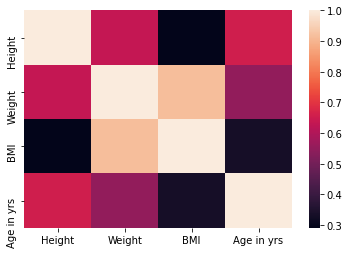

In [14]:
import seaborn as sns
import plotly.express as px
ax = sns.heatmap(bmi_correl)
fig = px.imshow(data)

In [15]:
data1=pd.read_csv('bp values.csv')


In [18]:

data['systolic'] = data['systolic'].replace('0', np.nan)
data['diastolic']=data['diastolic'].replace('0',np.nan)
data[['systolic', 'diastolic']] = data[['systolic','diastolic']].fillna(value=0)

In [19]:
def toint(data):
    return int(data[0])
data['systolic'] = pd.to_numeric(data['systolic'], errors='coerce')
data['diastolic'] = pd.to_numeric(data['diastolic'], errors='coerce')
data['systolic'] = data['systolic'].astype(int)
data['diastolic']=data['diastolic'].astype(int)

In [20]:
def bp_con(cols):
    age=cols[0]
    sex=cols[1]
    sys=cols[2]
    dia=cols[3] if cols[3]!='' else 0
    if sys==0 or dia==0:
        return "NA"
    sys=int(sys)
    dia=int(dia)
    x1=data1[(data1['Gender']==sex) & (data1['Years']==age)]['Systolic']
    x2=data1[(data1['Gender']==sex) & (data1['Years']==age)]['Diastolic']
    x1 = int(''.join(map(str, x1)) if ''.join(map(str, x1))!='' else 0 )
    x2 = int(''.join(map(str, x2)) if ''.join(map(str, x2))!='' else 0)
    if(x1==0 or x2==0):
        return "NA"
    if (sys<=x1 and sys>(x1-10)) and (dia<=x2 and dia>(x2-5)):
        return "Normal"
    elif(sys<(x1-10) or dia<(x2-5)):
        return "Subnormal"
    elif(sys>x1 or dia>x2):
        return "Abnormal"
    else:
        return "NA"



In [21]:

print(bp_con([48,'Male',110,20]))

NA


In [22]:
data['bp_condition']=data[['Age in yrs','Sex','systolic','diastolic']].apply(bp_con,axis=1)

In [23]:
data1[(data1['Gender']=="Male") & (data1['Years']==3)]['Systolic'][0].astype(int)


100

In [24]:
data2=pd.read_csv('heights.csv')
data2

,Age,H1,H2,H3,Gender
0,5,97.2,100.5,119.3,Female
1,6,102.3,106.0,125.6,Female
2,7,107.4,111.4,131.9,Female
3,8,112.6,116.8,138.1,Female
4,9,117.8,122.4,144.5,Female
5,10,123.3,128.1,150.8,Female
6,11,128.8,133.7,156.8,Female
7,12,134.0,138.9,162.0,Female
8,13,138.2,142.9,165.9,Female
9,14,141.3,145.8,168.2,Female


In [25]:
def height_con(cols):
    age=cols[0]
    sex=cols[1]
    height=cols[2]
   
    h1=data2[(data2['Gender']==sex) & (data2['Age']==age)]['H1']
    h2=data2[(data2['Gender']==sex) & (data2['Age']==age)]['H2']
    h3=data2[(data2['Gender']==sex) & (data2['Age']==age)]['H3']
    h1 = float(''.join(map(str, h1)) if ''.join(map(str, h1))!='' else 0 )
    h2 = float(''.join(map(str, h2)) if ''.join(map(str, h2))!='' else 0 )
    h3 = float(''.join(map(str, h3)) if ''.join(map(str, h3))!='' else 0 )
    if(h1==0 or h2==0 or h3==0):
        return "NA"    
    if (height<=h1):
        return "Stunted"
    elif(height>h1 and height<h2):
        return "Borderline"
    elif(height>h2 and height<h3):
        return "Normal"
    elif(height>h3):
        return "Over-height"
    else:
        return "NA"


In [26]:
data['height_condition']=data[['Age in yrs','Sex','Height']].apply(height_con,axis=1)

In [27]:
print(height_con([32,'Male',110]))

NA


In [28]:
len(data[data["height_condition"]=="Over-height"])

19

In [29]:
def weight_con(cols):
    age=cols[0]
    sex=cols[1]
    weight=cols[2]
   
    w1=data3[(data3['Gender']==sex) & (data3['Age']==age)]['W1']
    w2=data3[(data3['Gender']==sex) & (data3['Age']==age)]['W2']
    w3=data3[(data3['Gender']==sex) & (data3['Age']==age)]['W3']
    w1 = float(''.join(map(str, w1)) if ''.join(map(str, w1))!='' else 0 )
    w2 = float(''.join(map(str, w2)) if ''.join(map(str, w2))!='' else 0 )
    w3 = float(''.join(map(str, w3)) if ''.join(map(str, w3))!='' else 0 )
    
    if (weight<=w1):
        return "Under-weight"
    elif(weight>w1 and weight<w2):
        return "Borderline"
    elif(weight>w2 and weight<w3):
        return "Normal"
    elif(weight>w3):
        return "Over-weight"
    else:
        return "NA"


In [30]:
data3=pd.read_csv('weights.csv')
data3

,Age,W1,W2,W3,Gender
0,2,9.807,10.501,15.074,Male
1,3,11.441,12.291,18.048,Male
2,4,12.902,13.904,20.852,Male
3,5,14.287,15.453,23.761,Male
4,6,14.500,15.800,28.300,Male
5,7,16.000,17.600,33.400,Male
6,8,17.500,19.500,39.400,Male
7,9,19.100,21.500,45.500,Male
8,10,20.700,23.500,51.800,Male
9,11,22.600,25.900,58.700,Male


In [31]:
data['weight_condition']=data[['Age in yrs','Sex','Weight']].apply(weight_con,axis=1)

In [32]:
len(data[data["weight_condition"]=="NA"])

4

In [33]:
data4=pd.read_csv('BMI.csv')
data4

,Age,Bmi1,Bmi2,Bmi3,Bmi4,Gender
0,2,13.924,16.019,16.8970,18.676,Male
1,3,13.482,15.599,16.4630,18.172,Male
2,4,13.187,15.333,16.2180,17.983,Male
3,5,12.600,14.946,15.9145,17.786,Male
4,6,12.200,14.900,16.0000,17.800,Male
5,7,12.300,15.100,16.3000,18.200,Male
6,8,12.500,15.500,16.7000,18.800,Male
7,9,12.700,15.900,17.3000,19.600,Male
8,10,12.900,16.400,18.0000,20.500,Male
9,11,13.100,17.000,18.7000,21.500,Male


In [34]:
def bmi_con(cols):
    age=cols[0]
    sex=cols[1]
    BMI=cols[2]
   
    b1=data4[(data4['Gender']==sex) & (data4['Age']==age)]['Bmi1']
    b2=data4[(data4['Gender']==sex) & (data4['Age']==age)]['Bmi2']
    b3=data4[(data4['Gender']==sex) & (data4['Age']==age)]['Bmi3']
    b4=data4[(data4['Gender']==sex) & (data4['Age']==age)]['Bmi4']
    b1 = float(''.join(map(str, b1)) if ''.join(map(str, b1))!='' else 0 )
    b2 = float(''.join(map(str, b2)) if ''.join(map(str, b2))!='' else 0 )
    b3 = float(''.join(map(str, b3)) if ''.join(map(str, b3))!='' else 0 )
    b4 = float(''.join(map(str, b4)) if ''.join(map(str, b4))!='' else 0 ) 
    
    if (BMI<=b1):
        return "Under-weight"
    elif(BMI>b1 and BMI<b2):
        return "Borderline"
    elif(BMI>b2 and BMI<b3):
        return "Normal"
    elif(BMI>b3 and BMI<b4):
        return "Over-weight"
    elif(BMI>b4):
        return "Obese"
    else:
        return "NA"


In [35]:
data['bmi_condition']=data[['Age in yrs','Sex','BMI']].apply(bmi_con,axis=1)

In [36]:
len(data[data["bmi_condition"]=="Borderline"])

671

In [37]:
data5=pd.concat([data1, data2, data3, data4])

In [38]:
data['Right_Eye_Power'].unique()

array(['6/36', '6/6', nan, '6/18', '6/12', '6/24', '6/60', '6/9'],
      dtype=object)

In [39]:
def eye_con(cols):
    rep=cols[0]
    lep=cols[1]
    if(rep == 0 or lep == 0):
        return "NA"  
    if (rep =='6/6'and lep =='6/6'):
        return "Normal"
    elif(rep =='6/12'or lep =='6/12' or rep =='6/12'or lep =='6/12' or rep =='6/9'or lep =='6/9'):
        return "Minor"
    elif(rep =='6/18'or lep =='6/18' or rep =='6/24'or lep =='6/24' or rep =='6/36'or lep =='6/36'or lep=='6/60' or rep=='6/60'):
        return "Major"
    else:
        return "NA"

In [40]:
data[['Right_Eye_Power','Left_Eye_Power']] = data[['Right_Eye_Power','Left_Eye_Power']].fillna(value=0)
data['eye_condition']=data[['Right_Eye_Power','Left_Eye_Power']].apply(eye_con,axis=1)

In [41]:
data.head()


,UHID,Sex,Age in yrs,Blood Group,Class,School ID,Height,Weight,BMI,Temperature,...,REP1,LEPG0,LEPG1,REPG0,REPG1,bp_condition,height_condition,weight_condition,bmi_condition,eye_condition
0,100-0000-0001,Male,13,A+ve,8,S0000001,152.2,57.2,24.7,96.4,...,36,6,6,6,12,Subnormal,Normal,Normal,Obese,Major
1,100-0000-0002,Male,14,O+ve,8,S0000001,160.7,36.9,14.3,97.5,...,6,NaN,NaN,NaN,NaN,Subnormal,Normal,Normal,Borderline,Normal
2,100-0000-0003,Female,13,O+ve,8,S0000001,143.7,37.2,18.0,97.7,...,6,NaN,NaN,NaN,NaN,Normal,Normal,Normal,Borderline,Normal
3,100-0000-0004,Female,13,B+ve,8,S0000001,157.3,45.4,18.3,97.8,...,6,NaN,NaN,NaN,NaN,Abnormal,Normal,Normal,Borderline,Normal
4,100-0000-0005,Male,14,B+ve,8,S0000001,154.2,40.1,16.9,9.3,...,6,NaN,NaN,NaN,NaN,Subnormal,Normal,Normal,Borderline,Normal


In [42]:
list(data[' School ID'].unique())

['S0000001', 'S0000005 ', 'S0000003 ', 'S0000002']

In [43]:
def teeth_con(cols):
    caries=cols[0]
    discoloration=cols[1]
    healthygums=cols[2]
    malocclusion=cols[3]
    oralhygiene=cols[4]
    teethwellformed=cols[5]
    
    if(caries==0 and discoloration==0 and healthygums==0 and malocclusion==0 and oralhygiene == 0 and teethwellformed==0):
        return "NA"  
    if (caries=='No' and discoloration=='No' and healthygums=='Yes' and malocclusion=='No' and (oralhygiene == 'Good' or oralhygiene=='Fair') and teethwellformed=='Yes' ):
        return "Normal"
    elif(caries=='Yes' and (discoloration=='No' or discoloration=='Yes') and (healthygums=='Yes' or healthygums=='No') and (malocclusion=='No' or malocclusion == 'Yes') and (oralhygiene == 'Good' or oralhygiene=='Fair' or oralhygiene == 'Poor') and (teethwellformed=='Yes' or teethwellformed=='No')):
        return "Abnormal"
    else:
        return "NA"

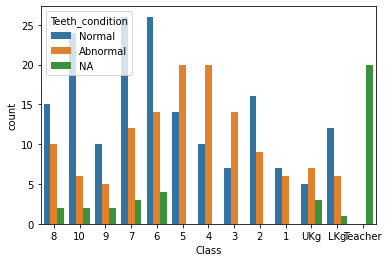

In [44]:
#select = st.sidebar.selectbox('Visualization based on', ['Sex','Class','Blood Group',' School ID'], key='21')
data[['Caries', 'Discoloration', 'Healthy_Gums', 'Malocclusion','Oral_Hygine', 'TeethWellFormed']] = data[['Caries', 'Discoloration', 'Healthy_Gums', 'Malocclusion','Oral_Hygine', 'TeethWellFormed']].fillna(value=0)
data['Teeth_condition']=data[['Caries', 'Discoloration', 'Healthy_Gums', 'Malocclusion','Oral_Hygine', 'TeethWellFormed']].apply(teeth_con,axis=1)

fig=sns.countplot(data=data[data[' School ID']=='S0000001'], x='Class', hue='Teeth_condition')
plt.show(fig)

In [45]:
data['Class'].unique()

array(['8', '10', '9', '7', '6', '5', '4', '3', '2', '1', 'UKg', 'LKg',
       'Teacher', 'SchoolStaff', 'PlayHome', 'Nursery'], dtype=object)

In [131]:
sbp=data[data[' School ID']=='S0000001']

In [132]:
school_count = sbp['bp_condition'].value_counts()
school_count

NA           125
Subnormal    107
Abnormal      91
Normal        15
Name: bp_condition, dtype: int64

In [133]:
count = pd.DataFrame({'conditions':school_count.index, 'Number of Students':school_count.values})

In [134]:
count

,conditions,Number of Students
0,NA,125
1,Subnormal,107
2,Abnormal,91
3,Normal,15


In [135]:
count = count.set_index("conditions")
if(count=='NA'):
    count = count.drop('NA')
    count=count.reset_index()

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [115]:
count[['conditions']]

,conditions
0,Subnormal
1,Abnormal
2,Normal


In [118]:
sbpm=data[(data[' School ID']=='S0000001') & (data['Class']=='5')]

In [119]:
school_count = sbpm['bp_condition'].value_counts()
school_count

Subnormal    19
Abnormal     10
NA            3
Normal        2
Name: bp_condition, dtype: int64

In [120]:
count = pd.DataFrame({'conditions':school_count.index, 'Number of Students':school_count.values})

In [130]:
count[count['conditions']=='NA']

,conditions,Number of Students


In [129]:
count

,conditions,Number of Students
0,Subnormal,19
1,Abnormal,10
2,Normal,2


In [55]:
data[['Caries', 'Discoloration', 'Healthy_Gums', 'Malocclusion','Oral_Hygine', 'TeethWellFormed']] = data[['Caries', 'Discoloration', 'Healthy_Gums', 'Malocclusion','Oral_Hygine', 'TeethWellFormed']].fillna(value=0)
data['Teeth_condition']=data[['Caries', 'Discoloration', 'Healthy_Gums', 'Malocclusion','Oral_Hygine', 'TeethWellFormed']].apply(teeth_con,axis=1)

In [56]:
def ent_con(cols):
    ent=cols[0]
 
    if(ent==0):
        return "NA"  
    if (ent=='No'):
        return "Normal"
    elif(ent=='Yes'):
        return "Abnormal"
    else:
        return "NA"

In [57]:
data[['ENT_Issue']] = data[['ENT_Issue']].fillna(value=0)
data['ENT_condition']=data[['ENT_Issue']].apply(ent_con,axis=1)

In [58]:
print(teeth_con(['No','No','Yes','No','Good','Yes']))

Normal


In [59]:
data.head(100)

,UHID,Sex,Age in yrs,Blood Group,Class,School ID,Height,Weight,BMI,Temperature,...,LEPG1,REPG0,REPG1,bp_condition,height_condition,weight_condition,bmi_condition,eye_condition,Teeth_condition,ENT_condition
0,100-0000-0001,Male,13,A+ve,8,S0000001,152.2,57.2,24.7,96.4,...,6,6,12,Subnormal,Normal,Normal,Obese,Major,Normal,Normal
1,100-0000-0002,Male,14,O+ve,8,S0000001,160.7,36.9,14.3,97.5,...,NaN,NaN,NaN,Subnormal,Normal,Normal,Borderline,Normal,Normal,Normal
2,100-0000-0003,Female,13,O+ve,8,S0000001,143.7,37.2,18.0,97.7,...,NaN,NaN,NaN,Normal,Normal,Normal,Borderline,Normal,Abnormal,Normal
3,100-0000-0004,Female,13,B+ve,8,S0000001,157.3,45.4,18.3,97.8,...,NaN,NaN,NaN,Abnormal,Normal,Normal,Borderline,Normal,Abnormal,Normal
4,100-0000-0005,Male,14,B+ve,8,S0000001,154.2,40.1,16.9,9.3,...,NaN,NaN,NaN,Subnormal,Normal,Normal,Borderline,Normal,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,100-0000-0103,Male,12,B+ve,6,S0000001,148.5,38.4,17.4,97.2,...,NaN,NaN,NaN,Abnormal,Normal,Normal,Borderline,Major,Normal,Normal
101,100-0000-0104,Male,11,B+ve,6,S0000001,147.9,38.5,17.6,97.9,...,NaN,NaN,NaN,NA,Normal,Normal,Normal,Normal,Normal,Normal
102,100-0000-0105,Male,11,A-ve,6,S0000001,141.6,45.0,22.4,96.8,...,NaN,NaN,NaN,Abnormal,Normal,Normal,Obese,Normal,Abnormal,Normal
103,100-0000-0106,Male,10,A+ve,6,S0000001,129.2,98.6,59.1,98.6,...,NaN,NaN,NaN,Subnormal,Normal,Over-weight,Obese,Normal,Abnormal,Normal


In [60]:
def health_con(cols):
    eye=cols[0]
    teeth=cols[1]
    ent=cols[2]
    
    if(eye==0 and teeth==0 and ent==0):
        return "NA"  
    if (eye=='Normal' and teeth=='Normal' and ent=='Normal'):
        return "Normal"
    elif((eye=='Minor' or eye=='Normal') and (teeth=='Normal' or teeth=='Abnormal') and (ent=='Normal' or ent=='Abnormal')):
        return "Minor"
    elif(eye=='Major' and (teeth=='Normal' or teeth=='Abnormal') and (ent=='Normal' or ent=='Abnormal')):
        return "Major"
    else:
        return "NA"

In [61]:
data['Health_condition']=data[['eye_condition', 'Teeth_condition','ENT_condition']].apply(health_con,axis=1)

In [62]:
data.columns

Index(['UHID', 'Sex', 'Age in yrs', 'Blood Group', 'Class', ' School ID',
       'Height', 'Weight', 'BMI', 'Temperature', 'BP', 'Pulse', 'CBTestResult',
       'Caries', 'Discoloration', 'Healthy_Gums', 'Malocclusion',
       'Oral_Hygine', 'TeethWellFormed', 'Serious_Dental_Issue',
       'Dentist_Recommendation', 'LEFT_EAR', 'RIGHT_EAR', 'ENT_Issue',
       'Eye_Issue', 'ENT_Issue_Detail', 'Eye_Issue_Detail', 'Wears_Glass',
       'Left_Eye_Power', 'Right_Eye_Power', 'Left_Eye_Pwr_WthGlass',
       'Right_Eye_Pwr_WthGlass', 'Overall Summary', 'Recommendation',
       'systolic', 'diastolic', 'LEP0', 'LEP1', 'REP0', 'REP1', 'LEPG0',
       'LEPG1', 'REPG0', 'REPG1', 'bp_condition', 'height_condition',
       'weight_condition', 'bmi_condition', 'eye_condition', 'Teeth_condition',
       'ENT_condition', 'Health_condition'],
      dtype='object')

In [116]:
data['Sex'].unique()

array(['Male', 'Female'], dtype=object)